In [1]:
pip install pytrends

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 2.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import time

Trending_topics = TrendReq(hl='en-US', tz=360)

In [3]:
kw_list=["Cloud Computing"]
Trending_topics.build_payload(kw_list,cat=0, timeframe='today 12-m')
time.sleep(5)

In [5]:
kw_list = ["Cloud Computing"]
Trending_topics.build_payload(kw_list, cat=0, timeframe='2024-01-01 2024-02-01', geo='', gprop='')
data = Trending_topics.interest_over_time()
data = data.sort_values(by="Cloud Computing", ascending = False)
data = data.head(10)
print(data)

            Cloud Computing  isPartial
date                                  
2024-01-29              100      False
2024-01-03               97      False
2024-01-10               87      False
2024-01-30               85      False
2024-01-23               81      False
2024-01-08               80      False
2024-01-27               80      False
2024-01-09               79      False
2024-01-24               79      False
2024-01-31               77      False


In [6]:
data = Trending_topics.interest_by_region()
data = data.sort_values(by="Cloud Computing", 
                        ascending = False)
data = data.head(10)
print(data)

             Cloud Computing
geoName                     
St. Helena               100
Ethiopia                  88
Nepal                     87
India                     63
Cameroon                  52
Sri Lanka                 45
Ghana                     43
Nigeria                   41
South Korea               36
Pakistan                  35


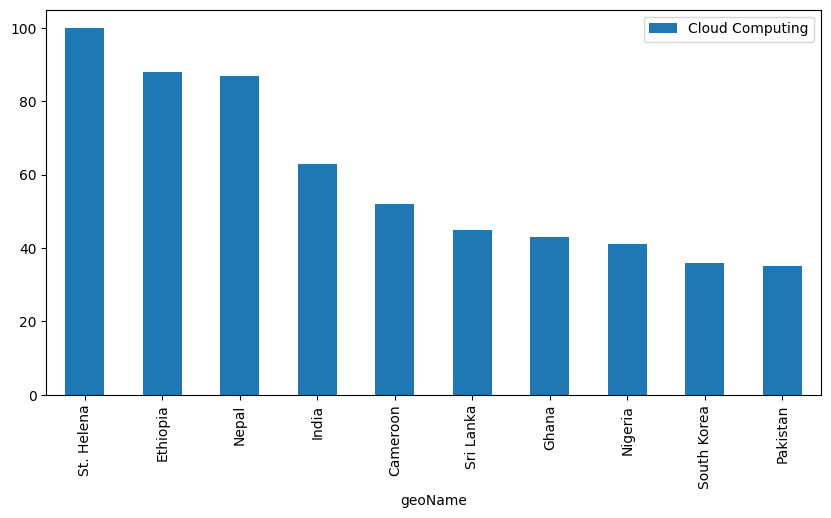

In [7]:
data.reset_index().plot(x='geoName', y='Cloud Computing',
                        figsize=(10,5), kind="bar")
plt.style.use('fivethirtyeight')
plt.show()

In [8]:
try:
    Trending_topics.build_payload(kw_list=['Cloud Computing'])
    related_queries = Trending_topics.related_queries()
    related_queries.values()
except (KeyError, IndexError):
    print("No related queries found for 'Cloud Computing'")

No related queries found for 'Cloud Computing'


In [9]:
keywords = Trending_topics.suggestions(
  keyword='Cloud Computing')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')

,title,type
0,Cloud computing,Topic
1,Cloud computing security,Topic
2,Cloud computing,Topic
3,Alibaba Cloud,Computer application company
4,Private cloud computing infrastructure,Topic
